# Yelp Data Challenge - Data Preprocessing

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

In [1]:
import json
import pandas as pd

In [2]:
import os
os.chdir("/Users/yaru/Downloads/".format('bella_yang'))

In [3]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'dataset/business.json',
    'dataset/checkin.json',
    'dataset/review.json',
    'dataset/tip.json',
    'dataset/user.json'
]

#### Business Data

In [4]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [5]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA


In [6]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.0+ MB


#### Checkin Data

In [7]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(2)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."


#### Review Data

In [8]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw


#### Tip Data

In [9]:
with open(file_tip) as f:
     df_tip = pd.DataFrame(json.loads(line) for line in f)

#### User Data

In [10]:
with open(file_user) as f:
     df_user = pd.DataFrame(json.loads(line) for line in f)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category

In [12]:
# Create Pandas DataFrame filters
cond_city = df_business['city'] == 'Las Vegas'
cond_category_not_null = ~df_business['categories'].isnull()
cond_category_restaurant = df_business['categories'].apply(str).str.contains('Restaurants')

In [13]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[cond_city & cond_category_not_null & cond_category_restaurant]

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [14]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [18]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [20]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={'stars':'avg_stars'}, inplace=True)

/Users/yaru/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [22]:
# Inspect your DataFrame
df_selected_business.info()
df_selected_business.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5899 entries, 52 to 174469
Data columns (total 4 columns):
business_id    5899 non-null object
name           5899 non-null object
categories     5899 non-null object
avg_stars      5899 non-null float64
dtypes: float64(1), object(3)
memory usage: 230.4+ KB


,business_id,name,categories,avg_stars
52,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",4.0
53,4srfPk1s8nlm1YusyDUbjg,Subway,"[Fast Food, Restaurants, Sandwiches]",2.5
54,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"[Arcades, Arts & Entertainment, Gastropubs, Re...",3.0
91,F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"[Italian, Restaurants]",1.5
122,Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"[Restaurants, Fast Food, Burgers]",2.0


#### Save results to csv files

In [23]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv("dataset/selected_business.csv", index=False, encoding='utf-8')

In [24]:
# Try reload the csv file to check if everything works fine
pd.read_csv("dataset/selected_business.csv",encoding='utf-8').head()

,business_id,name,categories,avg_stars
0,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"['Nightlife', 'Bars', 'Barbeque', 'Sports Bars...",4.0
1,4srfPk1s8nlm1YusyDUbjg,Subway,"['Fast Food', 'Restaurants', 'Sandwiches']",2.5
2,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"['Arcades', 'Arts & Entertainment', 'Gastropub...",3.0
3,F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"['Italian', 'Restaurants']",1.5
4,Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"['Restaurants', 'Fast Food', 'Burgers']",2.0


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [ ]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

#### Prepare dataframes to be joined, - on business_id

In [25]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [26]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')

#### Join and reset index

In [27]:
# Join df_left and df_right. What type of join?
df_joined = df_left.join(df_right, how='inner')

In [28]:
# You may want to reset the index 
df_joined.reset_index(inplace=True)

#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [29]:
# Make a filter that selects date after 2015-01-20
cond_date = df_joined['date'] > u'2015-01-20'

In [30]:
# Filter the joined DataFrame and name it as df_final
df_final = df_joined[cond_date]
df_final.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
5,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g


#### Take a glance at the final dataset

* Do more EDA here as you like!

In [31]:
import matplotlib.pyplot as plt

% matplotlib inline

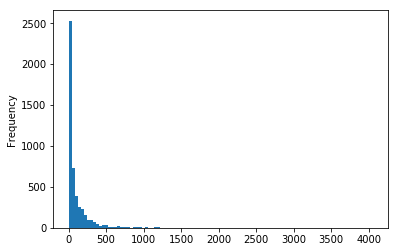

In [32]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final['business_id'].value_counts().plot.hist(bins=100)
plt.show()

## Save the preprocessed dataset to csv file

In [33]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv('dataset/last_2_years_restaurant_reviews.csv',index=False, encoding='utf-8')